In [ ]:
# DEMO of STATIC AC / DC power flow injection using PSSe w/ WEC-GRID wrapper  

In [1]:
# Jupyter Notebook Settings

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [12]:
# Importing Libs including WEC-GRID

import sys
sys.path.append('../wec-grid-code') # 
import pandas as pd
import wec_grid_class as wg
import matplotlib.pyplot as plt
import numpy as np
import sqlite3
plt.rcParams["figure.figsize"] = (15,10)

    Sets PSSE environment to latest minor version among installed versions of PSSE 35.
    Use psse35.set_minor(n) to set PSSE35 minor version (n) to use.
        Example, for PSSE 35.0.x, use this as: psse35.set_minor(0)

 Input error detected at !
 -m ipykernel_launcher -f C:\Users\barajale\AppData\Roaming\jupyter\runtime\kernel-3ed09afc-342f-4908-aae8-de9098b491f2.json
                          !

 PSS(R)E Xplore Version 35
 Copyright (c) 1976-2022
 Siemens Industry, Inc.,
 Power Technologies International                            (PTI)
 This program is a confidential  unpublished  work  created  and  first
 licensed in 1976.  It is a trade secret which is the property of  PTI.
 All use,  disclosure,  and/or reproduction not specifically authorized
 by  PTI  is prohibited.   This  program is protected  under  copyright
 laws  of  non-U.S.  countries  and  by  application  of  international
 treaties.  All  Rights  Reserved  Under  The  Copyright  Laws.


           SIEMENS POWER T

In [14]:
# Read in case file
case14 = r"../input_files/case14.raw"

In [15]:
# initalize WEC GRID Objec
w2g_obj = wg.Wec_grid(case14, solver='fnsl', wec_bus=3)


 Reading IC, SBASE, REV, XFRRAT, NXFRAT, BASFRQ...

 Converting RAW data from PSS(R)E 33 to PSS(R)E 34 format
 Starting processing of Case identification data records
 Finished processing of 3 records for Case identification data
 Starting processing of Bus data records
 Finished processing of 14 records for Bus data
 Starting processing of Load data records
 Finished processing of 11 records for Load data
 Starting processing of Fixed shunt data records
 Finished processing of 1 records for Fixed shunt data
 Starting processing of Generator data records
 Finished processing of 5 records for Generator data
 Starting processing of Branch data records
 Finished processing of 17 records for Branch data
 Finished processing of 0 records for System switching device data
 Starting processing of Transformer data records
 Finished processing of 12 records for 3 Transformer data
 Starting processing of Area data records
 Finished processing of 0 records for Area data
 Starting processing of Tw

In [16]:
w2g_obj.dataframe

,BUS_ID,Bus,BASE,PU,ANGLED,Type,P Gen,Q Gen,P Load,Q Load,P,Q
0,1,BUS 1,0.0,1.060000,0.000000,3,232.393265,-16.549339,NaN,NaN,232.393265,-16.549339
1,2,BUS 2,0.0,1.045000,-4.982592,2,40.000000,43.557102,21.700001,12.700001,18.299999,30.857101
2,3,BUS 3,0.0,1.010000,-12.725105,2,0.000000,25.075377,94.199997,19.000000,-94.199997,6.075377
3,4,BUS 4,0.0,1.017671,-10.312905,1,NaN,NaN,47.799999,-3.900000,-47.799999,3.900000
4,5,BUS 5,0.0,1.019514,-8.773857,1,NaN,NaN,7.600000,1.600000,-7.600000,-1.600000
5,6,BUS 6,0.0,1.070000,-14.220952,2,0.000000,12.731007,11.200000,7.500000,-11.200000,5.231006
6,7,BUS 7,0.0,1.061520,-13.359633,1,NaN,NaN,NaN,NaN,NaN,NaN
7,8,BUS 8,0.0,1.090000,-13.359632,2,0.000000,17.623468,NaN,NaN,0.000000,17.623468
8,9,BUS 9,0.0,1.055932,-14.938527,1,NaN,NaN,29.499998,16.600000,-29.499998,-16.600000
9,10,BUS 10,0.0,1.050985,-15.097295,1,NaN,NaN,9.000000,5.800000,-9.000000,-5.800000


In [5]:
from IPython.display import IFrame
IFrame("https://matpower.app", 800,500)

In [17]:
# injection file from WEC-SIM

injection_file = ('../input_files/WECgen_data.csv')
injection = pd.read_csv(injection_file)
injection


,time,ibus,machid,pg,qg,qt,qb,vs,ireg,nreg,...,xt,gtap,stat,rmpct,pt,pb,o1,f1,wmod,wpf
0,0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.5
1,300,1.0,1.0,0.019870,0.0,0.05,-0.05,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.019870,0.0,NaN,NaN,2.0,0.5
2,600,1.0,1.0,0.016054,0.0,0.05,-0.05,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.016054,0.0,NaN,NaN,2.0,0.5
3,900,1.0,1.0,0.020990,0.0,0.05,-0.05,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.020990,0.0,NaN,NaN,2.0,0.5
4,1200,1.0,1.0,0.016094,0.0,0.05,-0.05,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.016094,0.0,NaN,NaN,2.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,20400,1.0,1.0,0.021365,0.0,0.05,-0.05,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.021365,0.0,NaN,NaN,2.0,0.5
69,20700,1.0,1.0,0.017197,0.0,0.05,-0.05,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.017197,0.0,NaN,NaN,2.0,0.5
70,21000,1.0,1.0,0.022581,0.0,0.05,-0.05,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.022581,0.0,NaN,NaN,2.0,0.5
71,21300,1.0,1.0,0.020330,0.0,0.05,-0.05,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.020330,0.0,NaN,NaN,2.0,0.5


In [18]:
w2g_obj.ac_injection??

In [25]:
# iter over df and inject P and V 
for i in range(len(injection)):
    print("Time: {}".format(injection.iloc[i].time))
    print("P setpoint: {}".format(injection.pg.iloc[i]))
    print("V setpoint: {}".format(injection.vs.iloc[i]))

    w2g_obj.dc_injection(3, injection.pg.iloc[i], 'fnsl', injection.iloc[i].time)
    w2g_obj.dataframe
    
    print("========================")

Time: 0.0
P setpoint: nan
V setpoint: 1.0

 No power flow data changed for machine "1" at bus 3 [BUS 3             ]
here

 The working case has a largest mismatch of 0.0 MW at bus 5 [BUS 5             ]
                              PTI INTERACTIVE POWER SYSTEM SIMULATOR--PSS(R)E Xplore THU, SEP 15 2022  13:57



 X----------- FROM BUS -----------X   BASE CHANGE    GEN.    LOAD X------------ TO BUS ------------X         BASE CASE    RATE1    CHANGE CASE   DELTA
   BUS#-SCT X-- NAME --X BASKV AREA  ANGLE  ANGLE     MW      MW    BUS#-SCT X-- NAME --X BASKV AREA CKT     MW      MVA     MW      MW
      1     BUS 1                 1    0.0          232.4     0.0 --------------------------------------------------------------------------------
                                                                       2     BUS 2                 1  1    157.2
                                                                       5     BUS 5                 1  1     75.2
      2     BUS 2       

Time: 4800.0
P setpoint: 0.0210751656094055
V setpoint: 1.0

 Power flow data changed for machine "1" at bus 3 [BUS 3             ]:
 X--ORIGINAL--X  X-NEW VALUE--X  DATA ITEM
   0.234453E-01    0.210752E-01  PG
here

 The working case has a largest mismatch of 0.0 MW at bus 3 [BUS 3             ]
                              PTI INTERACTIVE POWER SYSTEM SIMULATOR--PSS(R)E Xplore THU, SEP 15 2022  13:57



 X----------- FROM BUS -----------X   BASE CHANGE    GEN.    LOAD X------------ TO BUS ------------X         BASE CASE    RATE1    CHANGE CASE   DELTA
   BUS#-SCT X-- NAME --X BASKV AREA  ANGLE  ANGLE     MW      MW    BUS#-SCT X-- NAME --X BASKV AREA CKT     MW      MVA     MW      MW
      1     BUS 1                 1    0.0          232.4     0.0 --------------------------------------------------------------------------------
                                                                       2     BUS 2                 1  1    157.2
                                          

Time: 9600.0
P setpoint: 0.0229467678259559
V setpoint: 1.0

 Power flow data changed for machine "1" at bus 3 [BUS 3             ]:
 X--ORIGINAL--X  X-NEW VALUE--X  DATA ITEM
   0.222746E-01    0.229468E-01  PG
here

 The working case has a largest mismatch of 0.01 MW at bus 3 [BUS 3             ]
                              PTI INTERACTIVE POWER SYSTEM SIMULATOR--PSS(R)E Xplore THU, SEP 15 2022  13:57



 X----------- FROM BUS -----------X   BASE CHANGE    GEN.    LOAD X------------ TO BUS ------------X         BASE CASE    RATE1    CHANGE CASE   DELTA
   BUS#-SCT X-- NAME --X BASKV AREA  ANGLE  ANGLE     MW      MW    BUS#-SCT X-- NAME --X BASKV AREA CKT     MW      MVA     MW      MW
      1     BUS 1                 1    0.0          232.4     0.0 --------------------------------------------------------------------------------
                                                                       2     BUS 2                 1  1    157.2
                                         

Time: 14100.0
P setpoint: 0.0187160235309671
V setpoint: 1.0

 Power flow data changed for machine "1" at bus 3 [BUS 3             ]:
 X--ORIGINAL--X  X-NEW VALUE--X  DATA ITEM
   0.246685E-01    0.187160E-01  PG
here

 The working case has a largest mismatch of 0.0 MW at bus 3 [BUS 3             ]
                              PTI INTERACTIVE POWER SYSTEM SIMULATOR--PSS(R)E Xplore THU, SEP 15 2022  13:57



 X----------- FROM BUS -----------X   BASE CHANGE    GEN.    LOAD X------------ TO BUS ------------X         BASE CASE    RATE1    CHANGE CASE   DELTA
   BUS#-SCT X-- NAME --X BASKV AREA  ANGLE  ANGLE     MW      MW    BUS#-SCT X-- NAME --X BASKV AREA CKT     MW      MVA     MW      MW
      1     BUS 1                 1    0.0          232.4     0.0 --------------------------------------------------------------------------------
                                                                       2     BUS 2                 1  1    157.2
                                         

 Output completed

 Original ac voltages are retained
Time: 18300.0
P setpoint: 0.017797953325263002
V setpoint: 1.0

 Power flow data changed for machine "1" at bus 3 [BUS 3             ]:
 X--ORIGINAL--X  X-NEW VALUE--X  DATA ITEM
   0.204902E-01    0.177980E-01  PG
here

 The working case has a largest mismatch of 0.0 MW at bus 3 [BUS 3             ]
                              PTI INTERACTIVE POWER SYSTEM SIMULATOR--PSS(R)E Xplore THU, SEP 15 2022  13:57



 X----------- FROM BUS -----------X   BASE CHANGE    GEN.    LOAD X------------ TO BUS ------------X         BASE CASE    RATE1    CHANGE CASE   DELTA
   BUS#-SCT X-- NAME --X BASKV AREA  ANGLE  ANGLE     MW      MW    BUS#-SCT X-- NAME --X BASKV AREA CKT     MW      MVA     MW      MW
      1     BUS 1                 1    0.0          232.4     0.0 --------------------------------------------------------------------------------
                                                                       2     BUS 2                

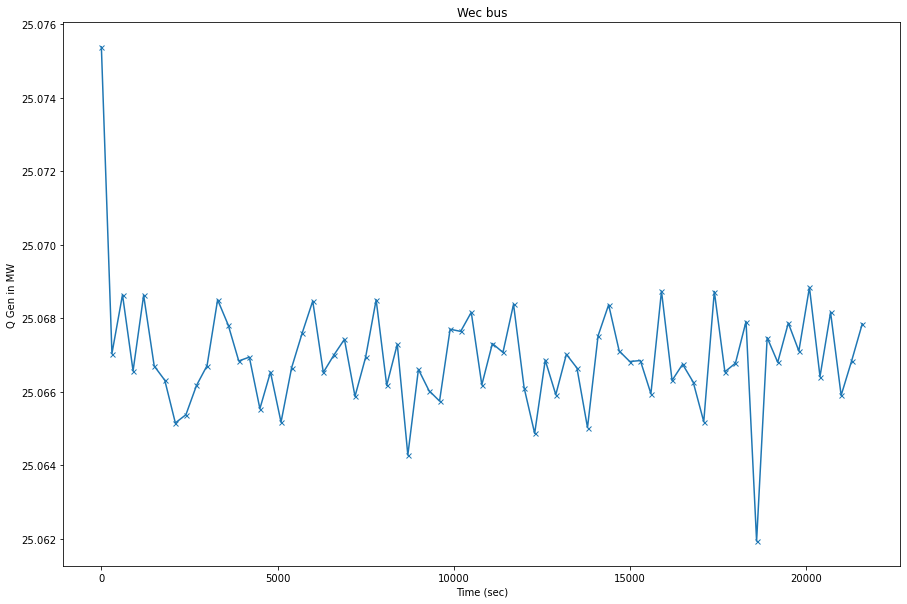

In [21]:
w2g_obj.plotWecBus('Q Gen')

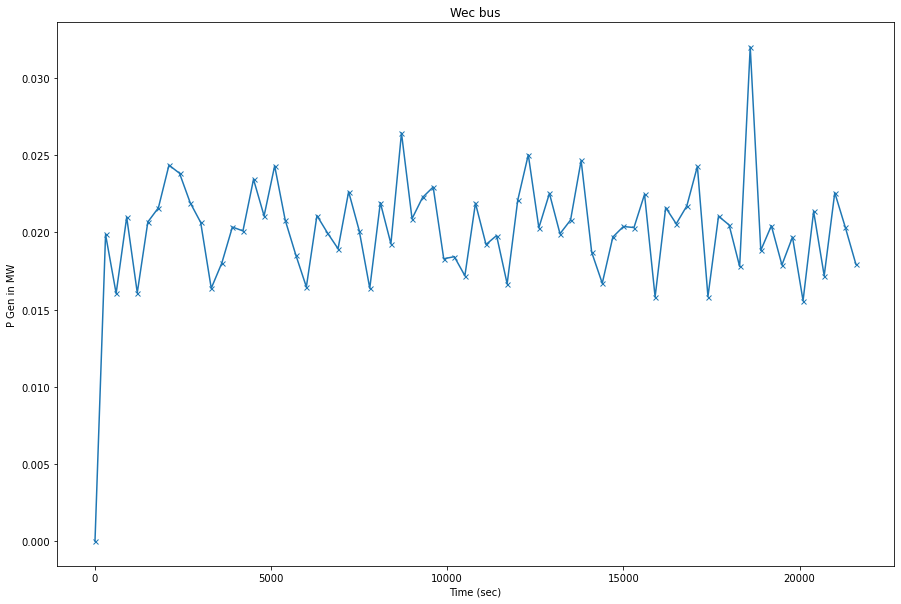

In [9]:
w2g_obj.plotWecBus('P Gen')

In [22]:
w2g_obj.history

{'Start':     BUS_ID     Bus  BASE        PU     ANGLED  Type       P Gen      Q Gen  \
 0        1   BUS 1   0.0  1.060000   0.000000     3  232.393265 -16.549339   
 1        2   BUS 2   0.0  1.045000  -4.982592     2   40.000000  43.557102   
 2        3   BUS 3   0.0  1.010000 -12.725105     2    0.000000  25.075377   
 3        4   BUS 4   0.0  1.017671 -10.312905     1         NaN        NaN   
 4        5   BUS 5   0.0  1.019514  -8.773857     1         NaN        NaN   
 5        6   BUS 6   0.0  1.070000 -14.220952     2    0.000000  12.731007   
 6        7   BUS 7   0.0  1.061520 -13.359633     1         NaN        NaN   
 7        8   BUS 8   0.0  1.090000 -13.359632     2    0.000000  17.623468   
 8        9   BUS 9   0.0  1.055932 -14.938527     1         NaN        NaN   
 9       10  BUS 10   0.0  1.050985 -15.097295     1         NaN        NaN   
 10      11  BUS 11   0.0  1.056906 -14.790627     1         NaN        NaN   
 11      12  BUS 12   0.0  1.055189 -15.075

In [23]:
w2g_obj.swingBus

,time,BUS_ID,Bus,BASE,PU,ANGLED,Type,P Gen,Q Gen,P Load,Q Load,P,Q
0,None,1,BUS 1,0.0,1.06,0.0,3,232.393265,-16.549339,NaN,NaN,232.393265,-16.549339
0,0,1,BUS 1,0.0,1.06,0.0,3,232.393265,-16.549339,NaN,NaN,232.393265,-16.549339
0,300,1,BUS 1,0.0,1.06,0.0,3,232.370667,-16.545109,NaN,NaN,232.370667,-16.545109
0,600,1,BUS 1,0.0,1.06,0.0,3,232.375000,-16.545921,NaN,NaN,232.375000,-16.545921
0,900,1,BUS 1,0.0,1.06,0.0,3,232.369400,-16.544870,NaN,NaN,232.369400,-16.544870
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,20400,1,BUS 1,0.0,1.06,0.0,3,232.368973,-16.544790,NaN,NaN,232.368973,-16.544790
0,20700,1,BUS 1,0.0,1.06,0.0,3,232.373718,-16.545679,NaN,NaN,232.373718,-16.545679
0,21000,1,BUS 1,0.0,1.06,0.0,3,232.367584,-16.544533,NaN,NaN,232.367584,-16.544533
0,21300,1,BUS 1,0.0,1.06,0.0,3,232.370132,-16.545012,NaN,NaN,232.370132,-16.545012


In [24]:
w2g_obj.wecBus

,time,BUS_ID,Bus,BASE,PU,ANGLED,Type,P Gen,Q Gen,P Load,Q Load,P,Q
2,None,3,BUS 3,0.0,1.01,-12.725105,2,0.000000,25.075377,94.199997,19.0,-94.199997,6.075377
2,0,3,BUS 3,0.0,1.01,-12.725105,2,0.000000,25.075378,94.199997,19.0,-94.199997,6.075378
2,300,3,BUS 3,0.0,1.01,-12.723248,2,0.019870,25.067034,94.199997,19.0,-94.180127,6.067034
2,600,3,BUS 3,0.0,1.01,-12.723605,2,0.016054,25.068634,94.199997,19.0,-94.183943,6.068634
2,900,3,BUS 3,0.0,1.01,-12.723145,2,0.020990,25.066563,94.199997,19.0,-94.179006,6.066563
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,20400,3,BUS 3,0.0,1.01,-12.723108,2,0.021365,25.066406,94.199997,19.0,-94.178632,6.066406
2,20700,3,BUS 3,0.0,1.01,-12.723498,2,0.017197,25.068155,94.199997,19.0,-94.182800,6.068155
2,21000,3,BUS 3,0.0,1.01,-12.722995,2,0.022581,25.065895,94.199997,19.0,-94.177416,6.065895
2,21300,3,BUS 3,0.0,1.01,-12.723206,2,0.020330,25.066841,94.199997,19.0,-94.179667,6.066841


Next stepps 
    validate all the functions (compared with MATPOWER)
    start on GUI
    tracking / vis functions
    high level (bash / python ) scripts
    unit test
    
    
    Dynamics!

In [6]:
print("hello world")

hello world


In [26]:
w2g_obj.dataframe

,BUS_ID,Bus,BASE,PU,ANGLED,Type,P Gen,Q Gen,P Load,Q Load,P,Q
0,1,BUS 1,0.0,1.060000,0.000000,3,232.372864,-16.545519,NaN,NaN,232.372864,-16.545519
1,2,BUS 2,0.0,1.045000,-4.982086,2,40.000000,43.552505,21.700001,12.700001,18.299999,30.852505
2,3,BUS 3,0.0,1.010000,-12.723429,2,0.017942,25.067842,94.199997,19.000000,-94.182055,6.067842
3,4,BUS 4,0.0,1.017671,-10.312136,1,NaN,NaN,47.799999,-3.900000,-47.799999,3.900000
4,5,BUS 5,0.0,1.019514,-8.773232,1,NaN,NaN,7.600000,1.600000,-7.600000,-1.600000
5,6,BUS 6,0.0,1.070000,-14.220278,2,0.000000,12.730853,11.200000,7.500000,-11.200000,5.230853
6,7,BUS 7,0.0,1.061520,-13.358887,1,NaN,NaN,NaN,NaN,NaN,NaN
7,8,BUS 8,0.0,1.090000,-13.358888,2,0.000000,17.623358,NaN,NaN,0.000000,17.623358
8,9,BUS 9,0.0,1.055932,-14.937793,1,NaN,NaN,29.499998,16.600000,-29.499998,-16.600000
9,10,BUS 10,0.0,1.050985,-15.096571,1,NaN,NaN,9.000000,5.800000,-9.000000,-5.800000
